In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
os.chdir('/home/minh/Research/RL_for_AL_acquisition')
EXPERIMENT_DIR = 'results/cifar10_classification_al_step_percentage=0.001_al_epochs=200_train_epochs=2_retrain_model_from_scratch=False'

In [18]:
def get_result_df(experiment_dir: str, data_type: str):
    master_df = None
    for subdir, dirs, files in os.walk(experiment_dir):
        for file in files:
            if file == f"{data_type}_results.csv":
                folder_ls = subdir.split('/')
                sampler = folder_ls[-2]
                run_timestamp = folder_ls[-1]
                df = pd.read_csv(os.path.join(subdir, file), header=0) # names=column_names)
                df["data_type"] = data_type
                df["exp_timestamp"] = run_timestamp
                df["sampler_type"] = sampler
                #if len(df) >= 100:  # todo this is hacky
                if master_df is None:
                    master_df = df
                else:
                    master_df = pd.concat([master_df, df])
    return master_df

# Test Plots

In [19]:
master_df = get_result_df(EXPERIMENT_DIR, "test")

In [20]:
master_df.columns

Index(['loss', 'micro_f1_metric', 'macro_f1_metric', 'accuracy_metric',
       'min_class_prediction_ratio', 'min_class_true_ratio',
       'max_class_prediction_ratio', 'max_class_true_ratio', 'step',
       'data_type', 'exp_timestamp', 'sampler_type'],
      dtype='object')

Text(0.5, 1.0, 'Test Loss score')

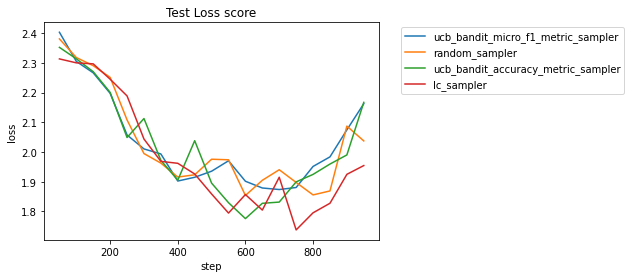

In [21]:
ax = sns.lineplot(x='step', y='loss', data=master_df[master_df['step'] < 1000], hue='sampler_type', ci=95, legend="brief")
ax.legend(loc='upper left',  bbox_to_anchor=(1.05, 1))
plt.title("Test Loss score")


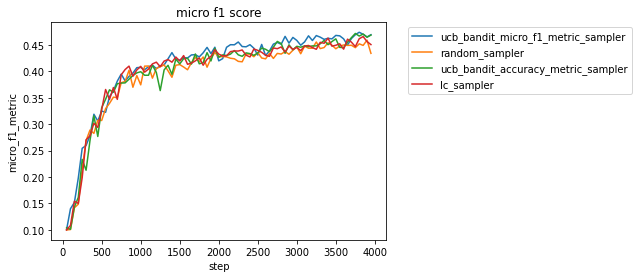

In [22]:
plt.title("micro f1 score")
ax = sns.lineplot(x='step', y='micro_f1_metric', data=master_df[master_df['step'] < 4000], hue='sampler_type', ci=50, legend="brief")
ax.legend(loc='upper left',  bbox_to_anchor=(1.05, 1))

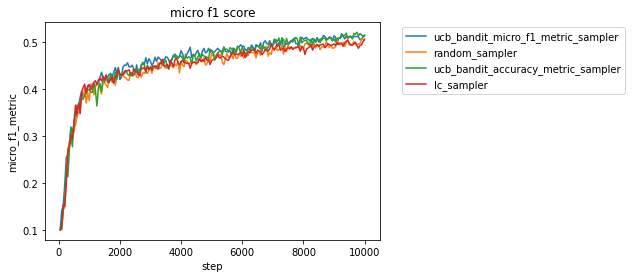

In [23]:
plt.title("micro f1 score")
ax = sns.lineplot(x='step', y='micro_f1_metric', data=master_df, hue='sampler_type', ci=95, legend="brief")
ax.legend(loc='upper left',  bbox_to_anchor=(1.05, 1))

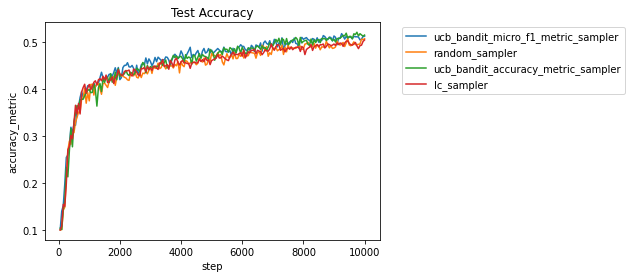

In [24]:
plt.title("Test Accuracy")
ax = sns.lineplot(x='step', y='accuracy_metric', data=master_df, hue='sampler_type', ci=95, legend="brief")
ax.legend(loc='upper left',  bbox_to_anchor=(1.05, 1))

In [25]:
# plt.title("Rare class prediction ratio")
ax = sns.lineplot(x='step', y='rare_class_prediction_ratio', data=master_df, hue='sampler_type', ci=95, legend="brief")
ax.legend(loc='upper left',  bbox_to_anchor=(1.05, 1))

ValueError: Could not interpret value `rare_class_prediction_ratio` for parameter `y`

# Train Data

In [16]:
master_df = get_result_df(EXPERIMENT_DIR, "train")

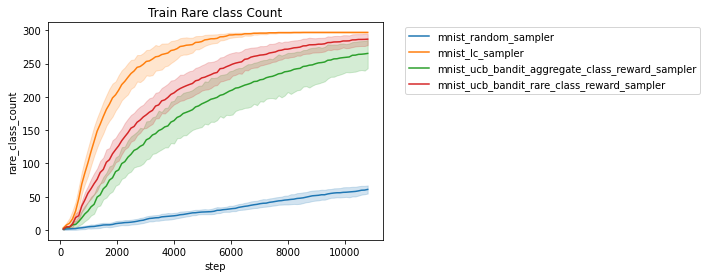

In [139]:
plt.title("Train Rare class Count")
ax = sns.lineplot(x='step', y='rare_class_count', data=master_df, hue='sampler_type', ci=95, legend="brief")
ax.legend(loc='upper left',  bbox_to_anchor=(1.05, 1))

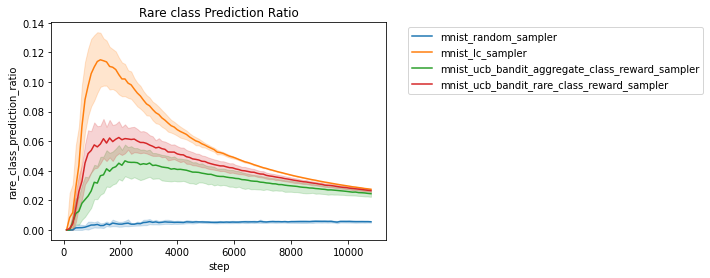

In [140]:
plt.title("Rare class Prediction Ratio")
ax = sns.lineplot(x='step', y='rare_class_prediction_ratio', data=master_df, hue='sampler_type', ci=95, legend="brief")
ax.legend(loc='upper left',  bbox_to_anchor=(1.05, 1))

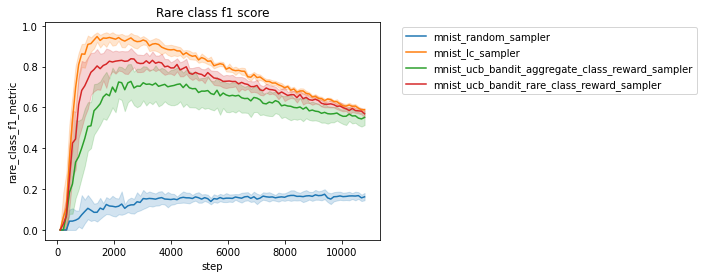

In [141]:
plt.title("Rare class f1 score")
ax = sns.lineplot(x='step', y='rare_class_f1_metric', data=master_df, hue='sampler_type', ci=95, legend="brief")
ax.legend(loc='upper left',  bbox_to_anchor=(1.05, 1))